In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
test_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/filtered1_test_data.csv")

In [4]:
train_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/filtered1_train_data.csv")

In [5]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

def preprocess_text(text):
    """Cleans text by lowercasing, removing stopwords, and applying stemming."""
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords, apply stemming
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]

    # Join words back into a string
    return " ".join(words)

train_df = train_df.copy()
test_df = test_df.copy()

# ✅ Use .loc to assign new column safely
train_df.loc[:, 'cleaned_text'] = train_df['tweet_text'].apply(preprocess_text)
test_df.loc[:, 'cleaned_text'] = test_df['tweet_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
train_df

,tweet_text,cyberbullying_type,cleaned_text
0,@Questionnier is dis a joke gay rape or babe rape,cyberbullying,questionni di joke gay rape babe rape
1,@cushen19 so when you get out of school you'll...,not_cyberbullying,cushen get school youll alreadi outdat dejavu
2,The smell of delusion is in the air. Just bc y...,cyberbullying,smell delus air bc feel type way doesnt make t...
3,RT @nickfalkner: I dededeconstructed my tart s...,not_cyberbullying,rt nickfalkn dededeconstruct tart jam lemon co...
4,Oh my god.,not_cyberbullying,oh god
...,...,...,...
12758,@GlobalCalgary Notice how seating of women and...,not_cyberbullying,globalcalgari notic seat women men seper one s...
12759,"as of now, favorite teams on #MKR would have t...",not_cyberbullying,favorit team mkr would eva amp debra amp steve...
12760,females like roseanne barr and those 2 hideous...,cyberbullying,femal like roseann barr hideou bitch call char...
12761,RT @RavenHUWolf: University of #Texas-#Arlingt...,not_cyberbullying,rt ravenhuwolf univers texasarlington muslim s...


In [7]:
label_mapping = {
    "not_cyberbullying": 0,
    "cyberbullying":1,
}


# Apply mapping
train_df["cyberbullying_encoded_type"] = train_df["cyberbullying_type"].map(label_mapping)
test_df["cyberbullying_encoded_type"] = test_df["cyberbullying_type"].map(label_mapping)
X_train, y_train,X_test,y_test= train_df['cleaned_text'], train_df['cyberbullying_encoded_type'],test_df['cleaned_text'], test_df['cyberbullying_encoded_type']


In [8]:
train_df

,tweet_text,cyberbullying_type,cleaned_text,cyberbullying_encoded_type
0,@Questionnier is dis a joke gay rape or babe rape,cyberbullying,questionni di joke gay rape babe rape,1
1,@cushen19 so when you get out of school you'll...,not_cyberbullying,cushen get school youll alreadi outdat dejavu,0
2,The smell of delusion is in the air. Just bc y...,cyberbullying,smell delus air bc feel type way doesnt make t...,1
3,RT @nickfalkner: I dededeconstructed my tart s...,not_cyberbullying,rt nickfalkn dededeconstruct tart jam lemon co...,0
4,Oh my god.,not_cyberbullying,oh god,0
...,...,...,...,...
12758,@GlobalCalgary Notice how seating of women and...,not_cyberbullying,globalcalgari notic seat women men seper one s...,0
12759,"as of now, favorite teams on #MKR would have t...",not_cyberbullying,favorit team mkr would eva amp debra amp steve...,0
12760,females like roseanne barr and those 2 hideous...,cyberbullying,femal like roseann barr hideou bitch call char...,1
12761,RT @RavenHUWolf: University of #Texas-#Arlingt...,not_cyberbullying,rt ravenhuwolf univers texasarlington muslim s...,0


In [9]:
all_words = ' '.join(train_df['cleaned_text']).split()
unique_words = set(all_words)

print(f"Number of unique words: {len(unique_words)}")
# Optionally, print a few unique words
# print(list(unique_words)[:10])

Number of unique words: 21769


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
max_words = 23177
max_sequence_length = 35
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(pd.concat([train_df['cleaned_text'], test_df['cleaned_text']]))
X_train = tokenizer.texts_to_sequences(train_df['cleaned_text'])
X_test = tokenizer.texts_to_sequences(test_df['cleaned_text'])
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [12]:
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, Bidirectional, LSTM, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [13]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length),  # Word embeddings

    Bidirectional(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)),
    LayerNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)),
    LayerNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.2)),
    LayerNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),     # 1st Dense layer
    Dropout(0.3),

    Dense(64, activation='relu'),      # 2nd Dense layer
    Dropout(0.3),

    Dense(32, activation='relu'),      # 3rd Dense layer
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

# Compile with lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.build(input_shape=(None, max_sequence_length))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 35, 128)        │     2,966,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 35, 512)        │       788,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization             │ (None, 35, 512)        │         1,024 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 35, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 35, 256)        │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ (None, 35, 256)        │           512 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 35, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ (None, 128)            │           256 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,604,545 (17.56 MB)

 Trainable params: 4,604,545 (17.56 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train model
early_stopping = EarlyStopping(
    monitor='val_loss',       # Metric to monitor
    patience=3,               # Number of epochs with no improvement before stopping
    restore_best_weights=True # Restore model weights from the best epoch
)

# Train model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 683ms/step - accuracy: 0.6072 - loss: 0.6505 - val_accuracy: 0.8859 - val_loss: 0.3028
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 671ms/step - accuracy: 0.9003 - loss: 0.2669 - val_accuracy: 0.8796 - val_loss: 0.2586
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 654ms/step - accuracy: 0.9447 - loss: 0.1622 - val_accuracy: 0.9024 - val_loss: 0.2421
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 647ms/step - accuracy: 0.9696 - loss: 0.0968 - val_accuracy: 0.9074 - val_loss: 0.2373
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 656ms/step - accuracy: 0.9769 - loss: 0.0742 - val_accuracy: 0.9021 - val_loss: 0.3133
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 674ms/step - accuracy: 0.9843 - loss: 0.0575 - val_accuracy: 0.8973 - val_loss: 0.3334
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 656ms/step - accuracy: 0.9857 - loss: 0.0448 - val_accuracy: 0.9071 - val_loss: 0.3750


In [16]:
import matplotlib.pyplot as plt

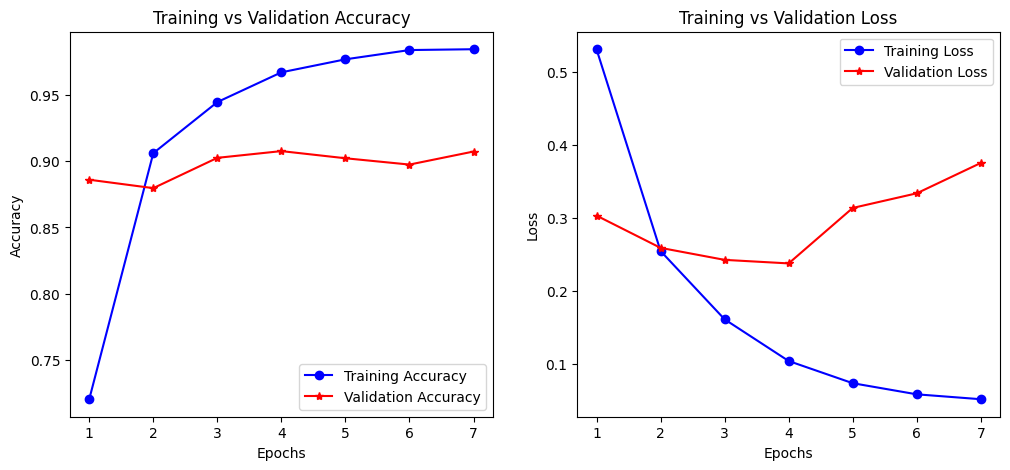

In [17]:
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

99/99 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step


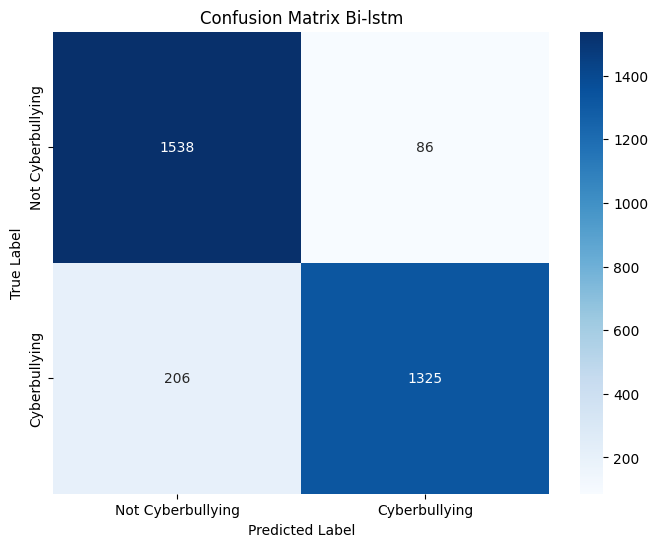

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test (true labels) and y_pred (predicted labels) are available
# from previous steps, which they are based on the kernel state.

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Cyberbullying', 'Cyberbullying'],
            yticklabels=['Not Cyberbullying', 'Cyberbullying'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Bi-lstm')
plt.show()

In [19]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Not Cyberbullying', 'Cyberbullying'])
print("Classification Report:\n", report)

Classification Report:
                    precision    recall  f1-score   support

Not Cyberbullying       0.88      0.95      0.91      1624
    Cyberbullying       0.94      0.87      0.90      1531

         accuracy                           0.91      3155
        macro avg       0.91      0.91      0.91      3155
     weighted avg       0.91      0.91      0.91      3155

